# [Exercise 4](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Exercises/E04_logistic_regression.ipynb)

In [1]:
import seaborn
import pandas
import numpy
import matplotlib.pyplot as pyplot
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

seaborn.set_style('white')

iris_raw_sklearn = load_iris()

## 0

### a)

In [2]:
print(iris_raw_sklearn.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### b)

In [3]:
iris_raw_sklearn['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_raw = pandas.DataFrame(
    data=numpy.c_[iris_raw_sklearn["data"], iris_raw_sklearn["target"]],
    columns=iris_raw_sklearn["feature_names"] + ["specie"],
).astype({'specie':int}).assign(specie_name=lambda x:iris_raw_sklearn['target_names'][x.specie])
iris_raw.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie,specie_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### c)

In [5]:
iris_raw.describe().drop('specie', axis=1).T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
sepal length (cm),5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
iris_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   specie             150 non-null    int32  
 5   specie_name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


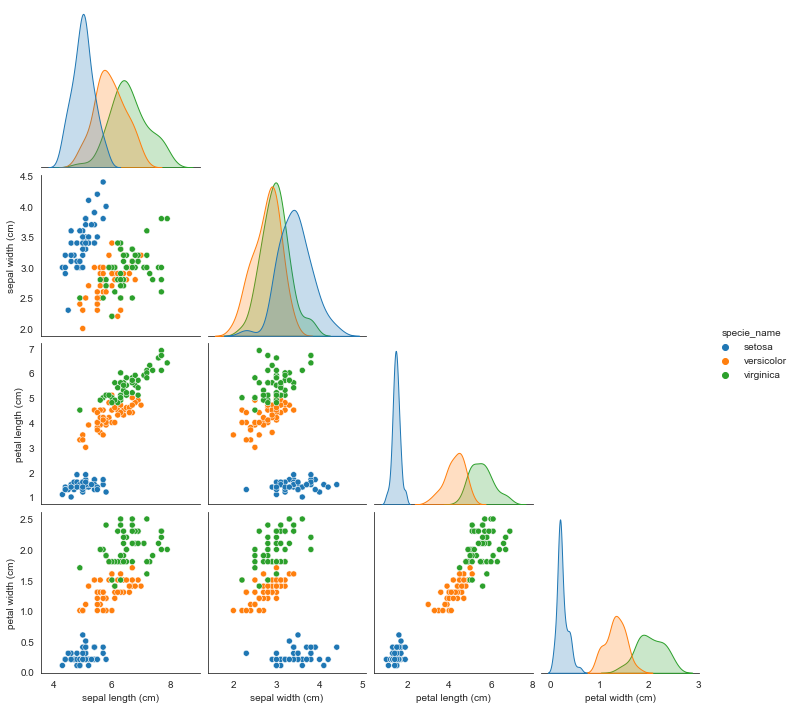

In [7]:
seaborn.pairplot(iris_raw.drop('specie', axis=1), corner=True, hue='specie_name')

### d)

<AxesSubplot:>

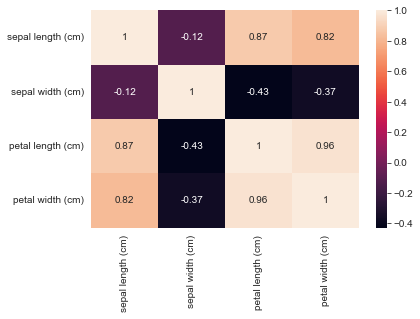

In [8]:
seaborn.heatmap(iris_raw.drop(['specie', 'specie_name'], axis=1).corr(), annot=True)

### e)

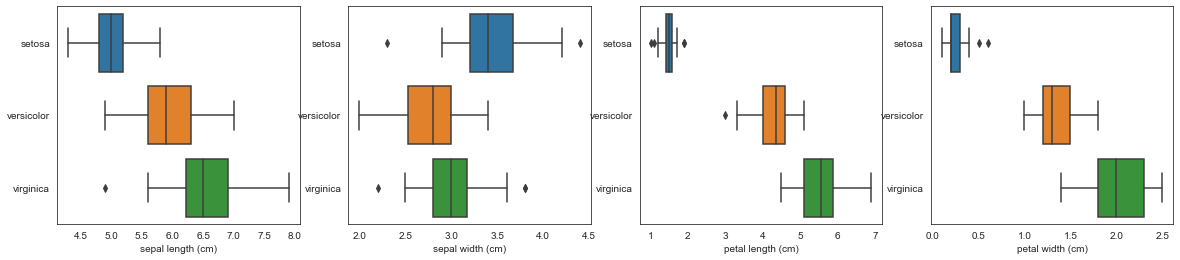

In [9]:
fix, axes = pyplot.subplots(1,4, figsize=(20,4))
for axis, column in zip(axes, iris_raw_sklearn['feature_names']):
    seaborn.boxplot(data=iris_raw, y='specie_name', x=column, ax=axis).set_ylabel('')

### f)

In [10]:
iris_clean = iris_raw.drop([13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131], axis=0)
iris_clean['specie_name'].value_counts()

versicolor    49
virginica     46
setosa        42
Name: specie_name, dtype: int64

## 1

In [11]:
X, y = iris_clean.drop(['specie', 'specie_name'], axis=1), iris_clean['specie']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.fit_transform(X_test_raw)
X_train.shape, X_test.shape

((91, 4), (46, 4))

## 2

In [12]:
logistic_regression_model = LogisticRegressionCV(
    cv=5,
    solver="saga",
    penalty="elasticnet",
    l1_ratios=[0.05, 0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 1],
    max_iter=10000,
)
logistic_regression_model.fit(X_train, y_train)
logistic_regression_model.coef_, logistic_regression_model.intercept_

(array([[-1.33045611,  1.35056816, -2.26147256, -2.07733301],
        [ 0.40093548, -0.28604794, -0.58418002, -0.77779106],
        [ 0.67974287, -0.81461737,  3.09494449,  3.10512315]]),
 array([-0.38460614,  2.62201526, -2.23740913]))

## 3

### a)

In [13]:
logistic_regression_model.predict(X_test[:10]), y_test[:10]

(array([2, 2, 0, 0, 2, 1, 1, 2, 2, 1]),
 115    2
 114    2
 12     0
 31     0
 136    2
 74     1
 72     1
 127    2
 146    2
 93     1
 Name: specie, dtype: int32)

### b)

0.9782608695652174


[Text(0.5, 1.0, 'Confusion Matrix for iris labels'),
 Text(0.5, 0, 'Predicted flower'),
 Text(0, 0.5, 'Actual flower')]

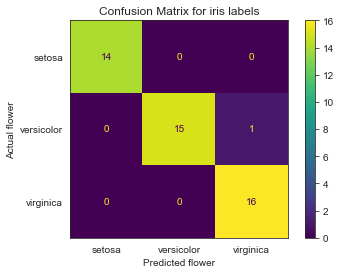

In [14]:
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
logistic_model_confusion_matrix = confusion_matrix(
    y_test, y_pred, labels=logistic_regression_model.classes_
)
ConfusionMatrixDisplay(
    logistic_model_confusion_matrix, display_labels=iris_clean["specie_name"].unique()
).plot().ax_.set(
    title="Confusion Matrix for iris labels",
    xlabel="Predicted flower",
    ylabel="Actual flower",
)


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46

